#### Plotting population growth

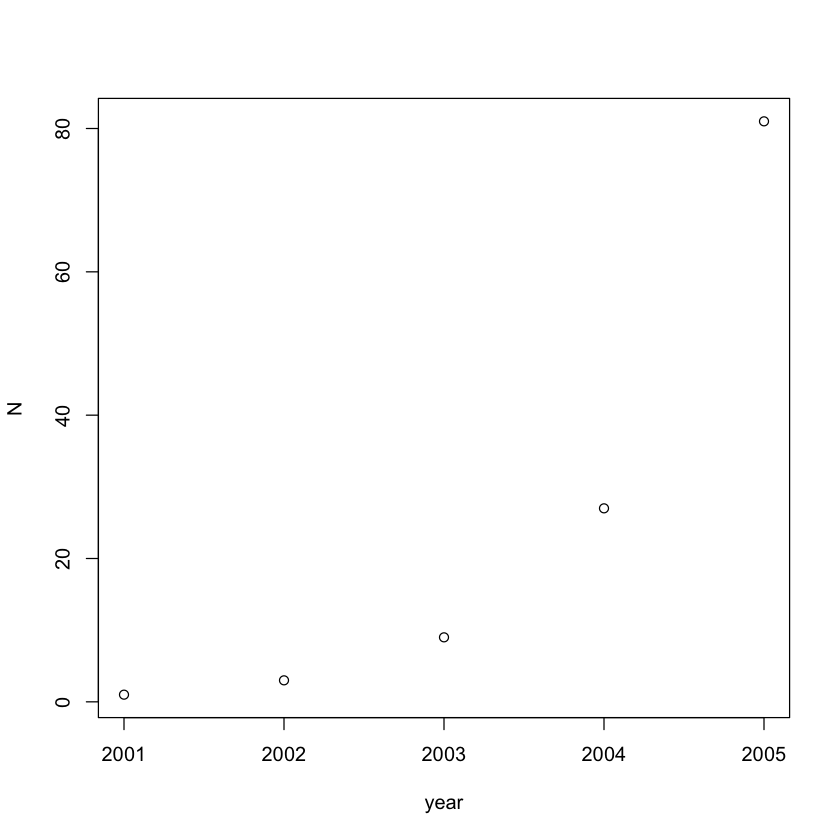

In [1]:
N = c(1, 3, 9, 27, 81)
year = 2001:2005
plot(year, N)

In [2]:
ratio = N[2:5]/N[1:4]

#### Population growth as geometric series:
$N_{t+1} = \lambda N_{t}$ and generally 
$N_{t} = \lambda^{t} N_{0}$ where $\lambda$ is considered per capita growth rate

Lambda can be written in terms of a discrete growth factor $r_{d}$, $\lambda = 1 + r_{d}$.

#### Projecting population size

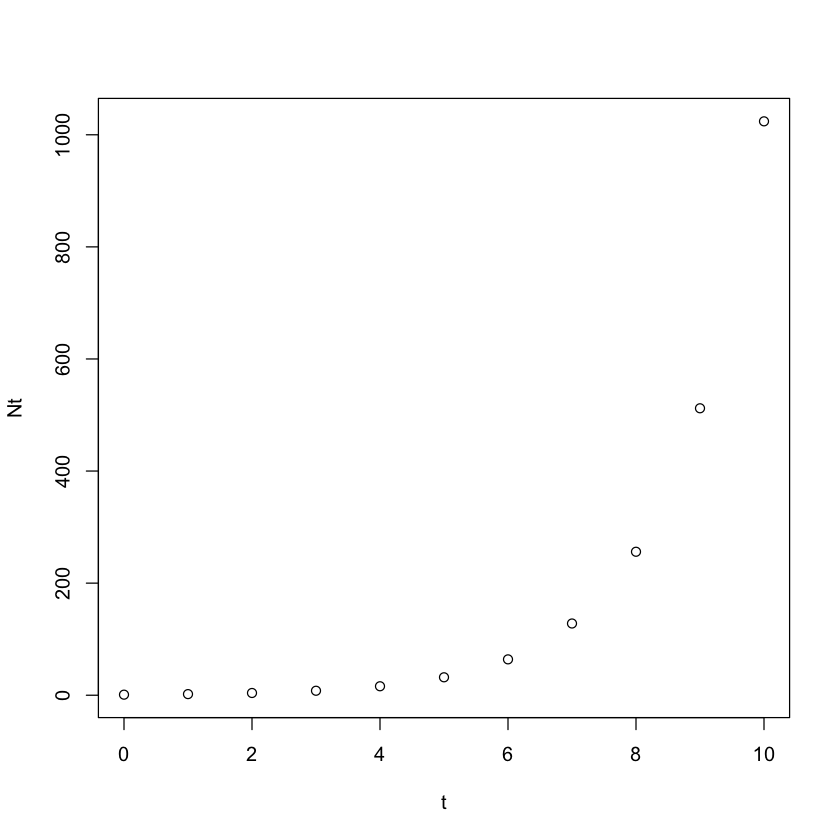

In [3]:
N0 = 1 # initial population size
t = 0:10 # time interval
lambda = 2 # growth factor
Nt = lambda^t * N0
plot(t, Nt)

#### Effects of initial population 

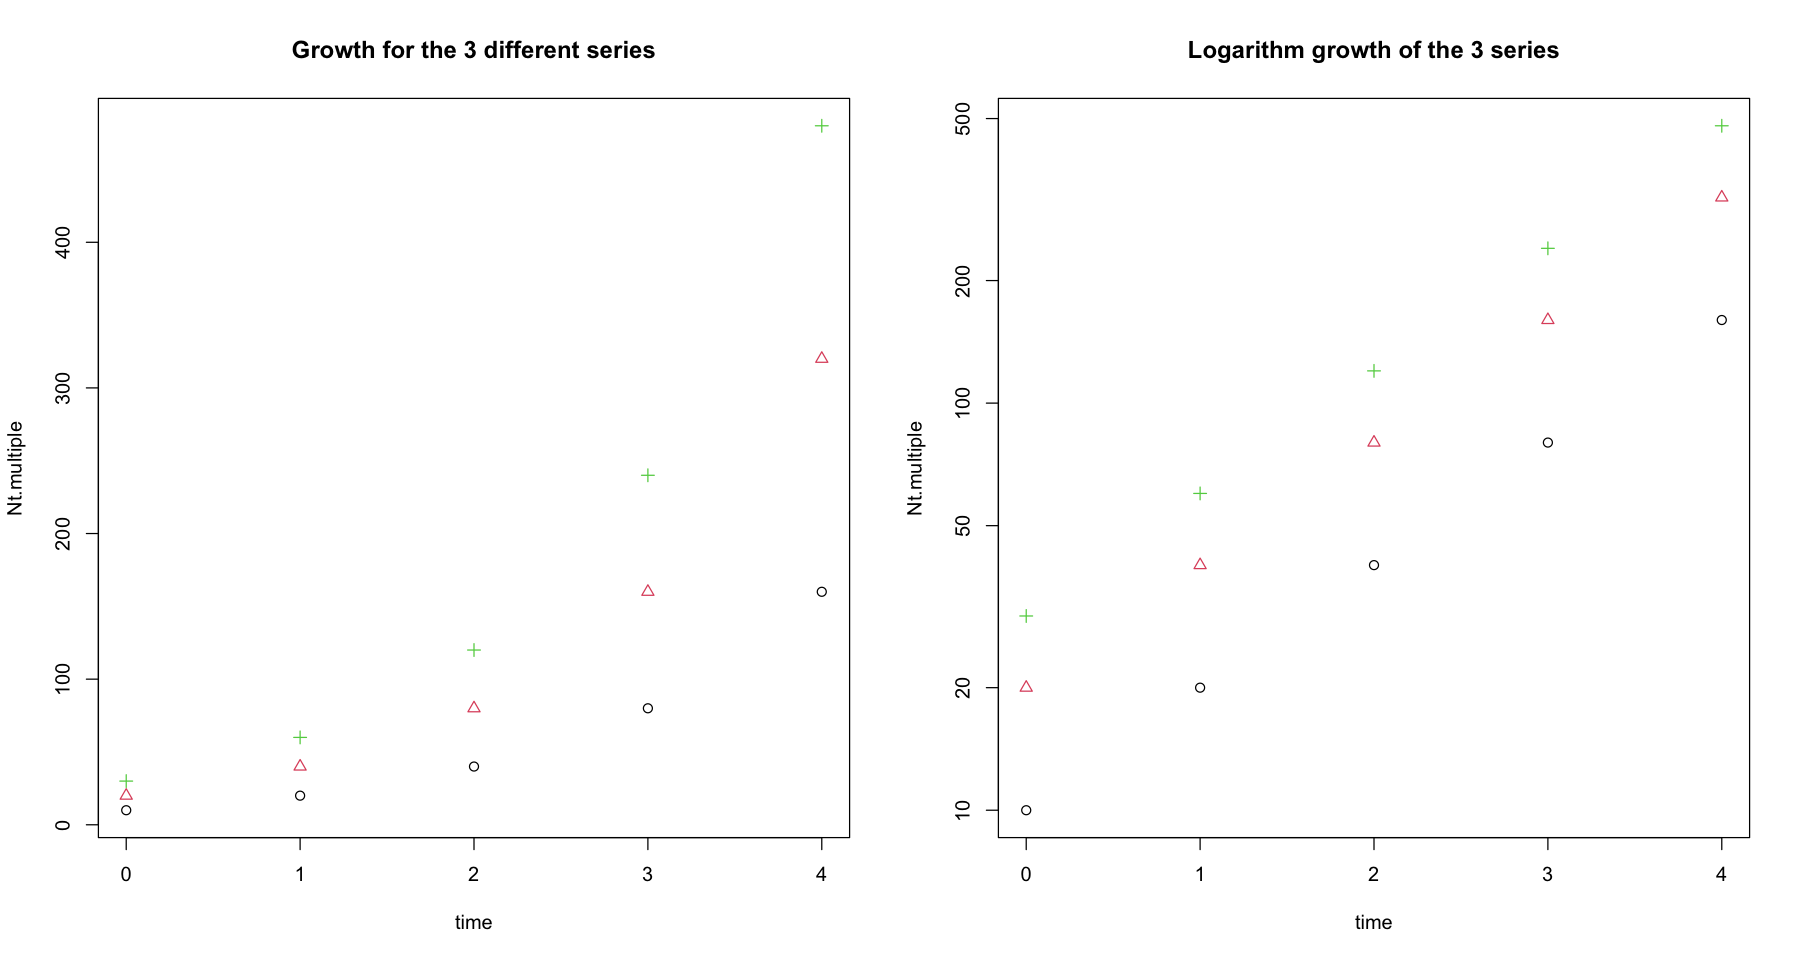

In [4]:
N0 = c(10, 20, 30)
lambda = 2
time = 0:4

options(repr.plot.width=15, repr.plot.height=8)
Nt.multiple = sapply(N0, function(n) n * lambda^time)
par(mfrow=c(1,2))
matplot(time, Nt.multiple, pch=1:3, main="Growth for the 3 different series")
matplot(time, Nt.multiple, log = "y", pch = 1:3, main="Logarithm growth of the 3 series")                     

#### Effects of different $\lambda$

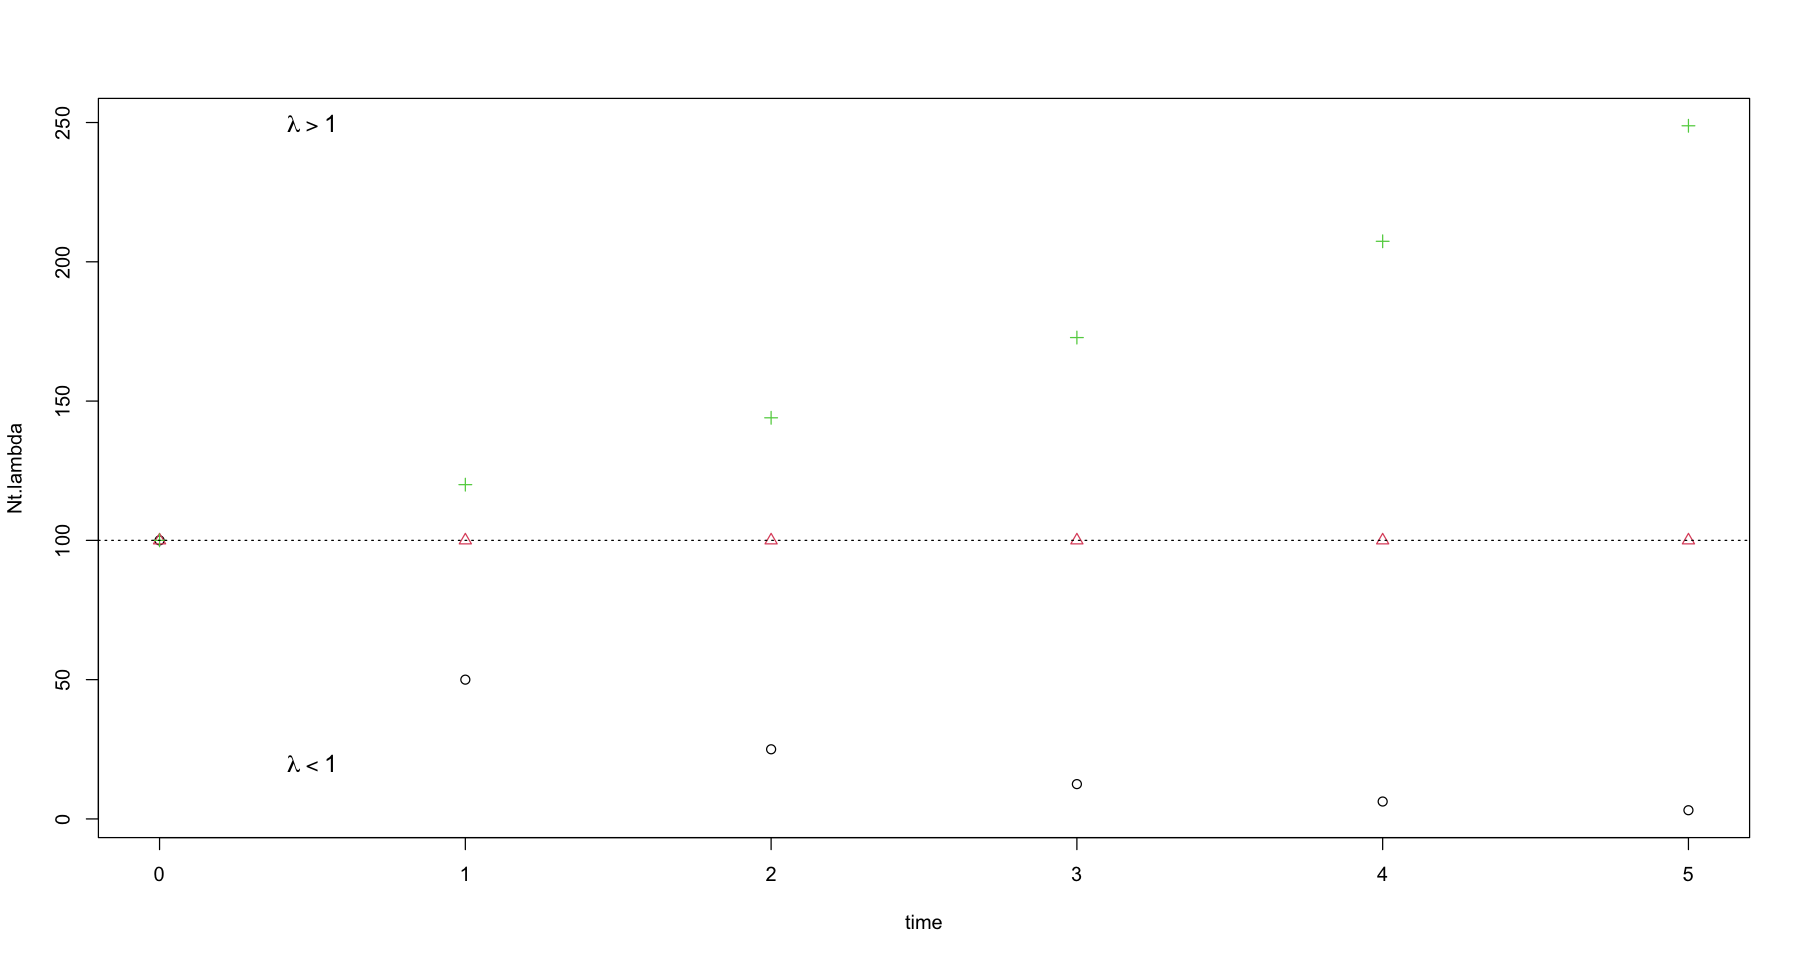

In [5]:
N0 = 100
lambda = c(0.5, 1, 1.2)
time = 0:5
Nt.lambda = sapply(lambda, function(n) n^time * N0)
matplot(time, Nt.lambda, pch=1:3)
abline(h = N0, lty = 3)
text(0.5, 250, expression(lambda > 1), cex = 1.2)
text(0.5, 20, expression(lambda < 1), cex = 1.2)

#### Exponential growth

We start by having $lambda = 1 + r_{d}$. This is a rate of change for a particular point. If we want to have instantaneous rate of change, we can consider how this would change many times over a particular range. We then divide by n (when n goes to infinity) $(1+\frac{r_{d}}{n})^n$.

$\lim_{n\to\infty} (1+frac{r_{d}}{n})^n = e^{r_{d}}$. 
In this case $\lambda = (1 + \frac{r_{d}}{n})^n = e^{r_{d}}$

$N_{t} = N_{0}*e^{rt}$

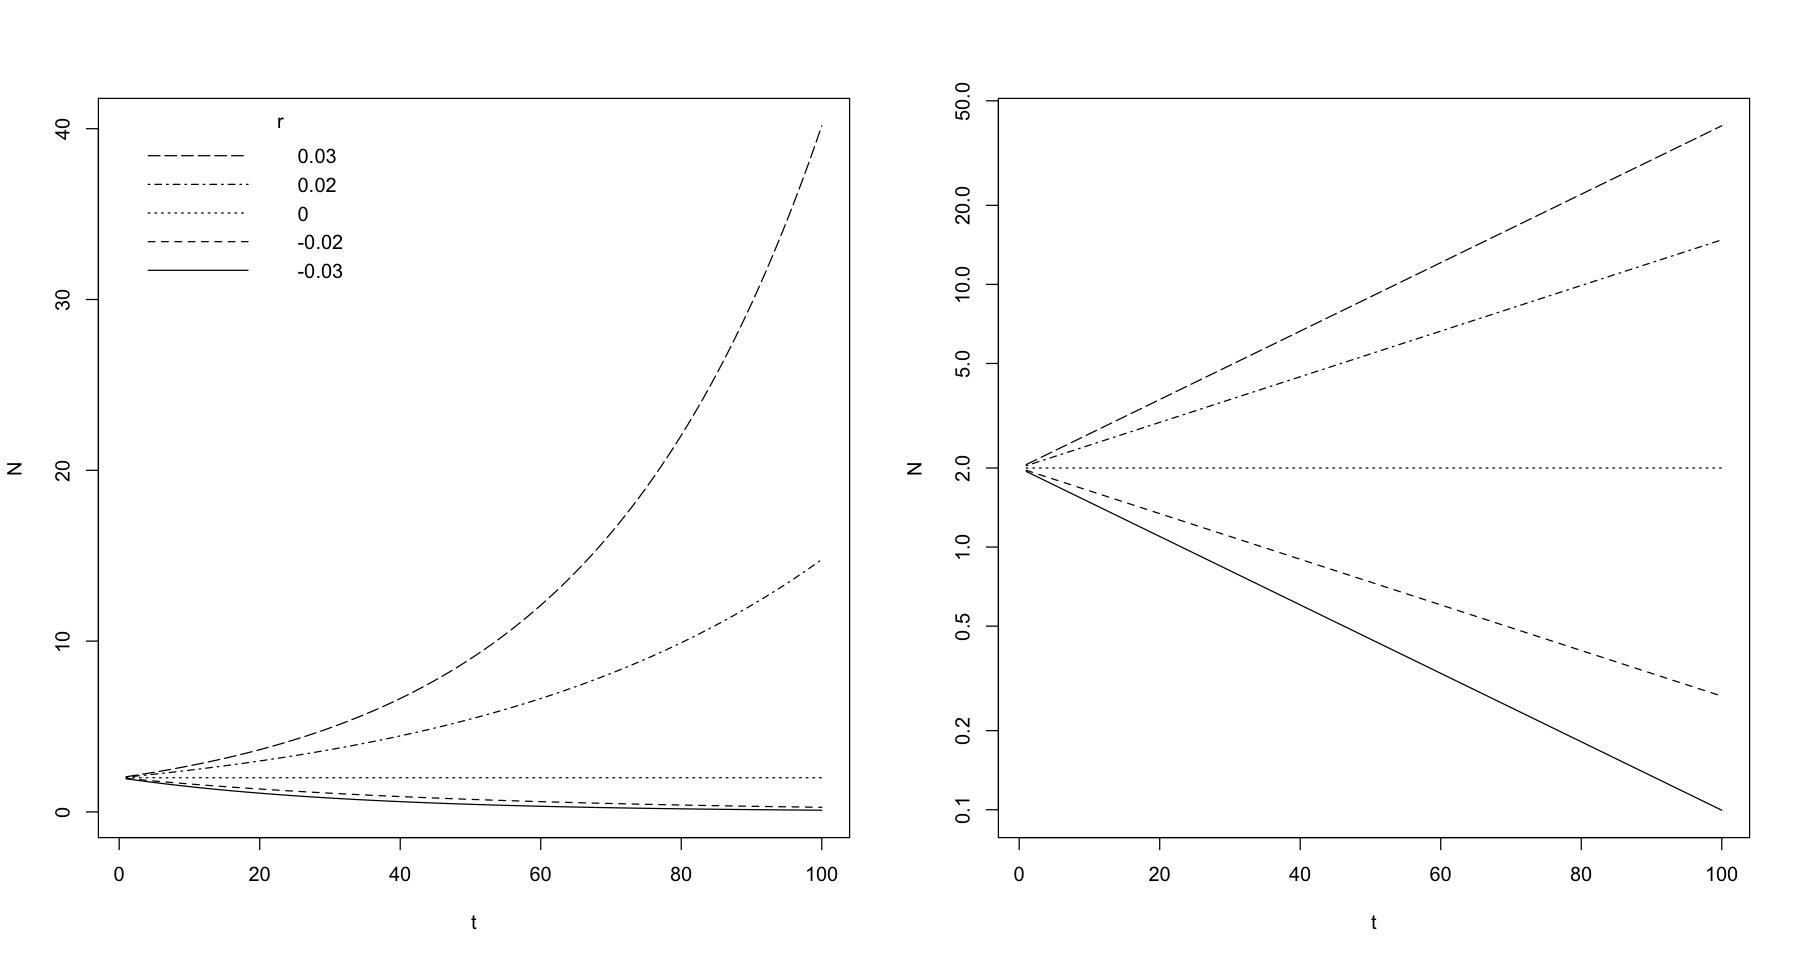

In [6]:
r <- c(-0.03, -0.02, 0, 0.02, 0.03)
N0 = 2
t = 1:100
options(repr.plot.width=15, repr.plot.height=8)
cont = sapply(r, function(n) N0 * exp(n*t))
layout(matrix(1:2, nrow = 1))
matplot(t, cont, type = "l", ylab = "N", col = 1)
legend("topleft", paste(rev(r)), lty = 5:1, col = 1, bty = "n", title = "r")
matplot(t, cont, type = "l", ylab = "N", log = "y", col = 1)

#### Doubling time

If we want to know how long it will take for a population to be a particular size (in relationship with the initial size) we can do the following:


e.g. doubling time:
$2N_{0} = N_{0} * e^{rt} => \ln{2} = rt => t = \frac{\ln{2}}{r}$ 

In [7]:
time_until = function(size, r) {
    return (log(size)/r)
}

Growth given $\lambda$ and r:

- $\lambda = 1$ or r = 0 - _no growth_
- $\lambda < 1$ or r < 0 - _decrease_
- $\lambda > 1$ or r > 0 - _increase_

Units are number of new individuals per individual in the population. 
If we want to scale, we can scale r but we cannot scale $\lambda$. In order to scale $\lambda$ we first scale r and we use the relationship between the two variables.

$\lambda = e^r => \ln{\lambda} = r$ 

### Simulating growth of song sparrows

In [18]:
options(warn=-1)
library(primer)
data(sparrows)

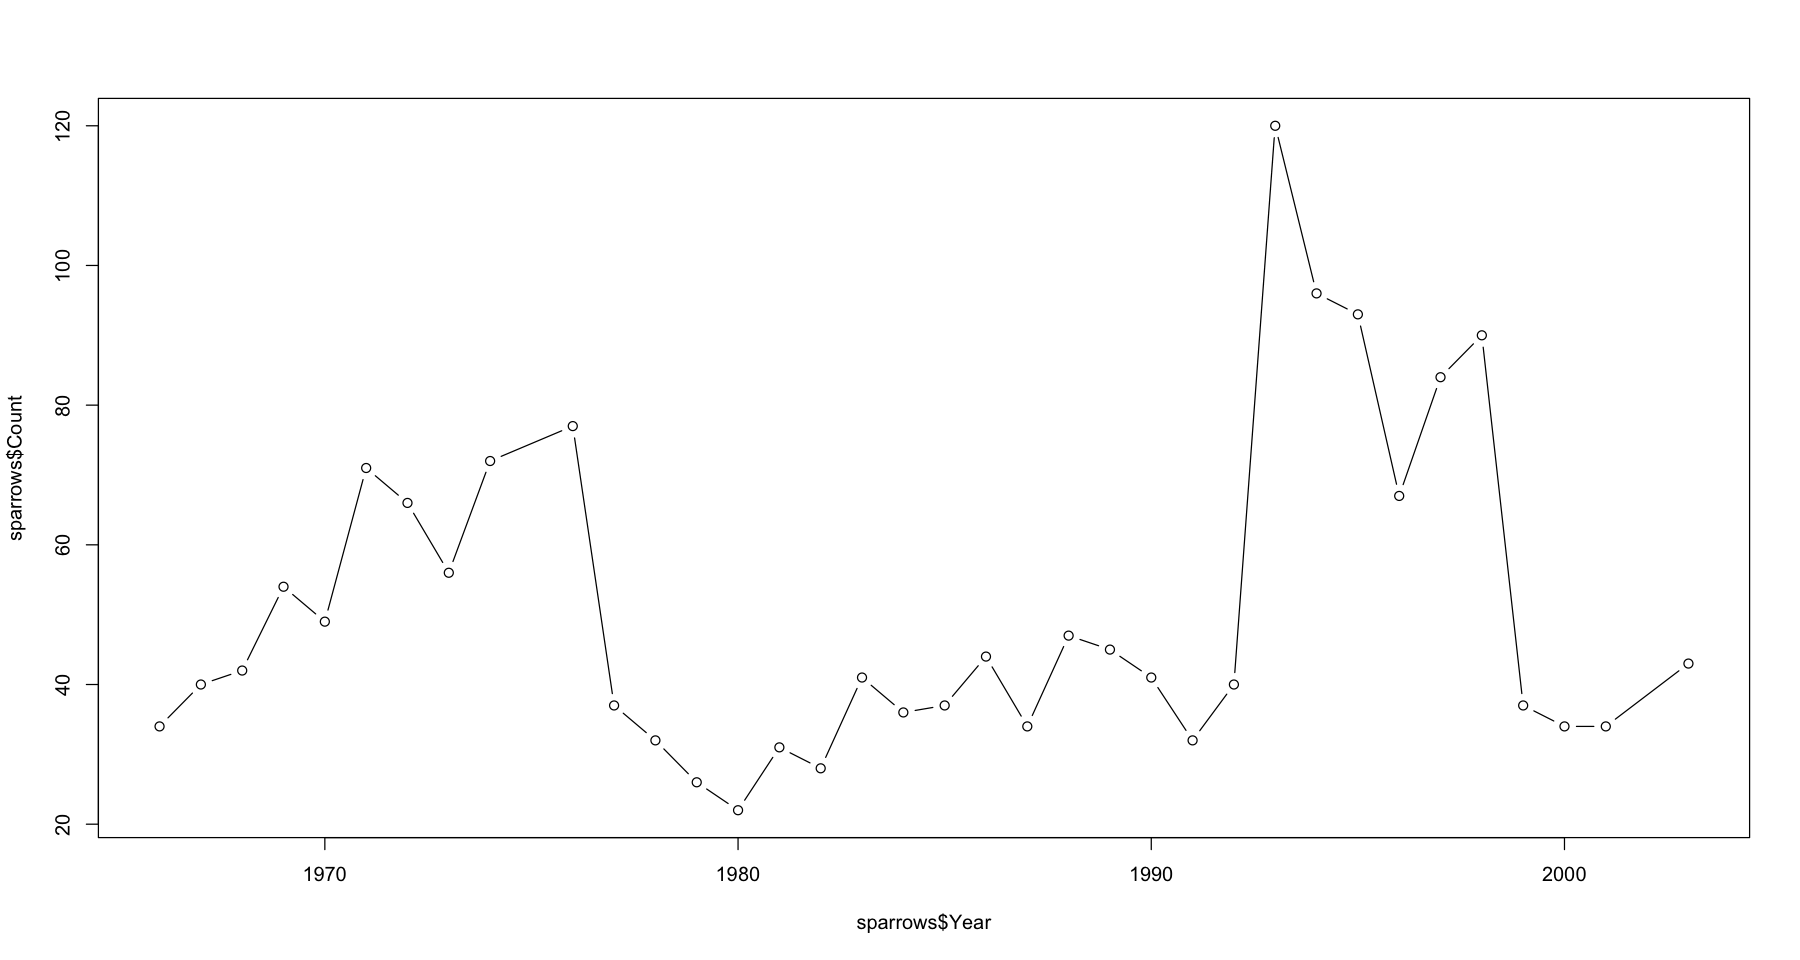

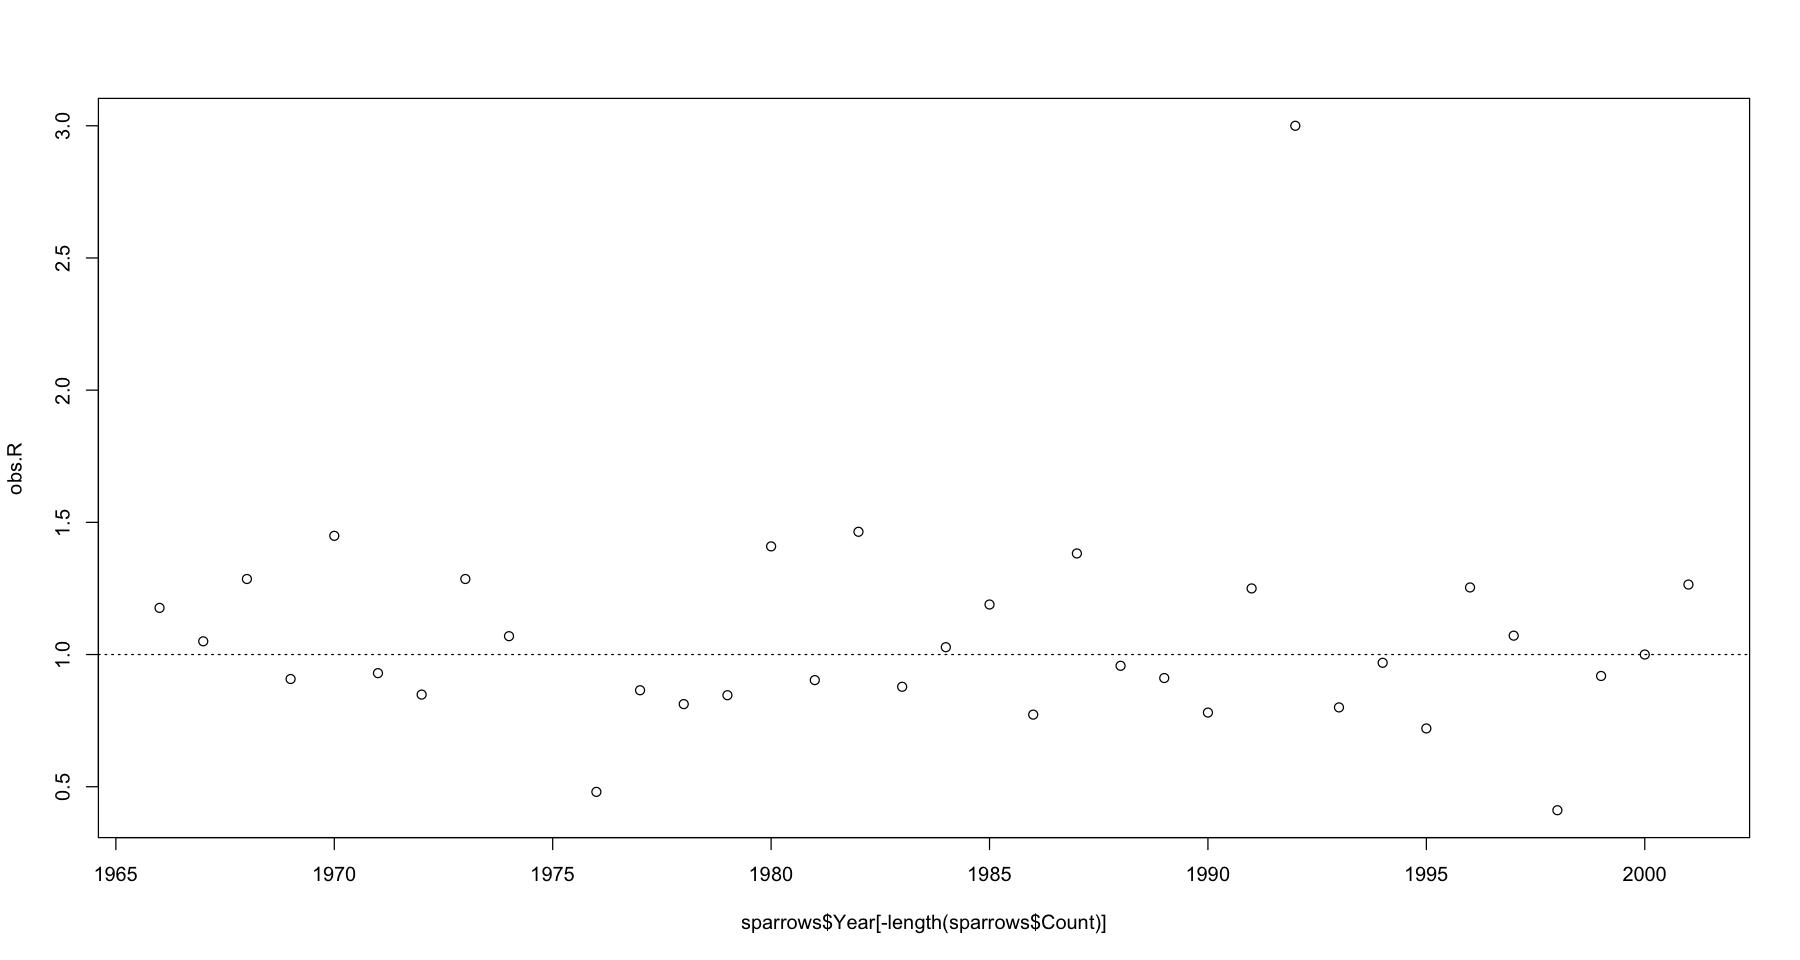

In [9]:
plot(sparrows$Count ~ sparrows$Year, type="b")
obs.R = sparrows$Count[-1] / sparrows$Count[-length(sparrows$Count)]
plot(obs.R ~ sparrows$Year[-length(sparrows$Count)])
abline(h=1, lty=3)

For simulation, we assume that the R values that we got above are representative for the values in the future. 

### One simulation

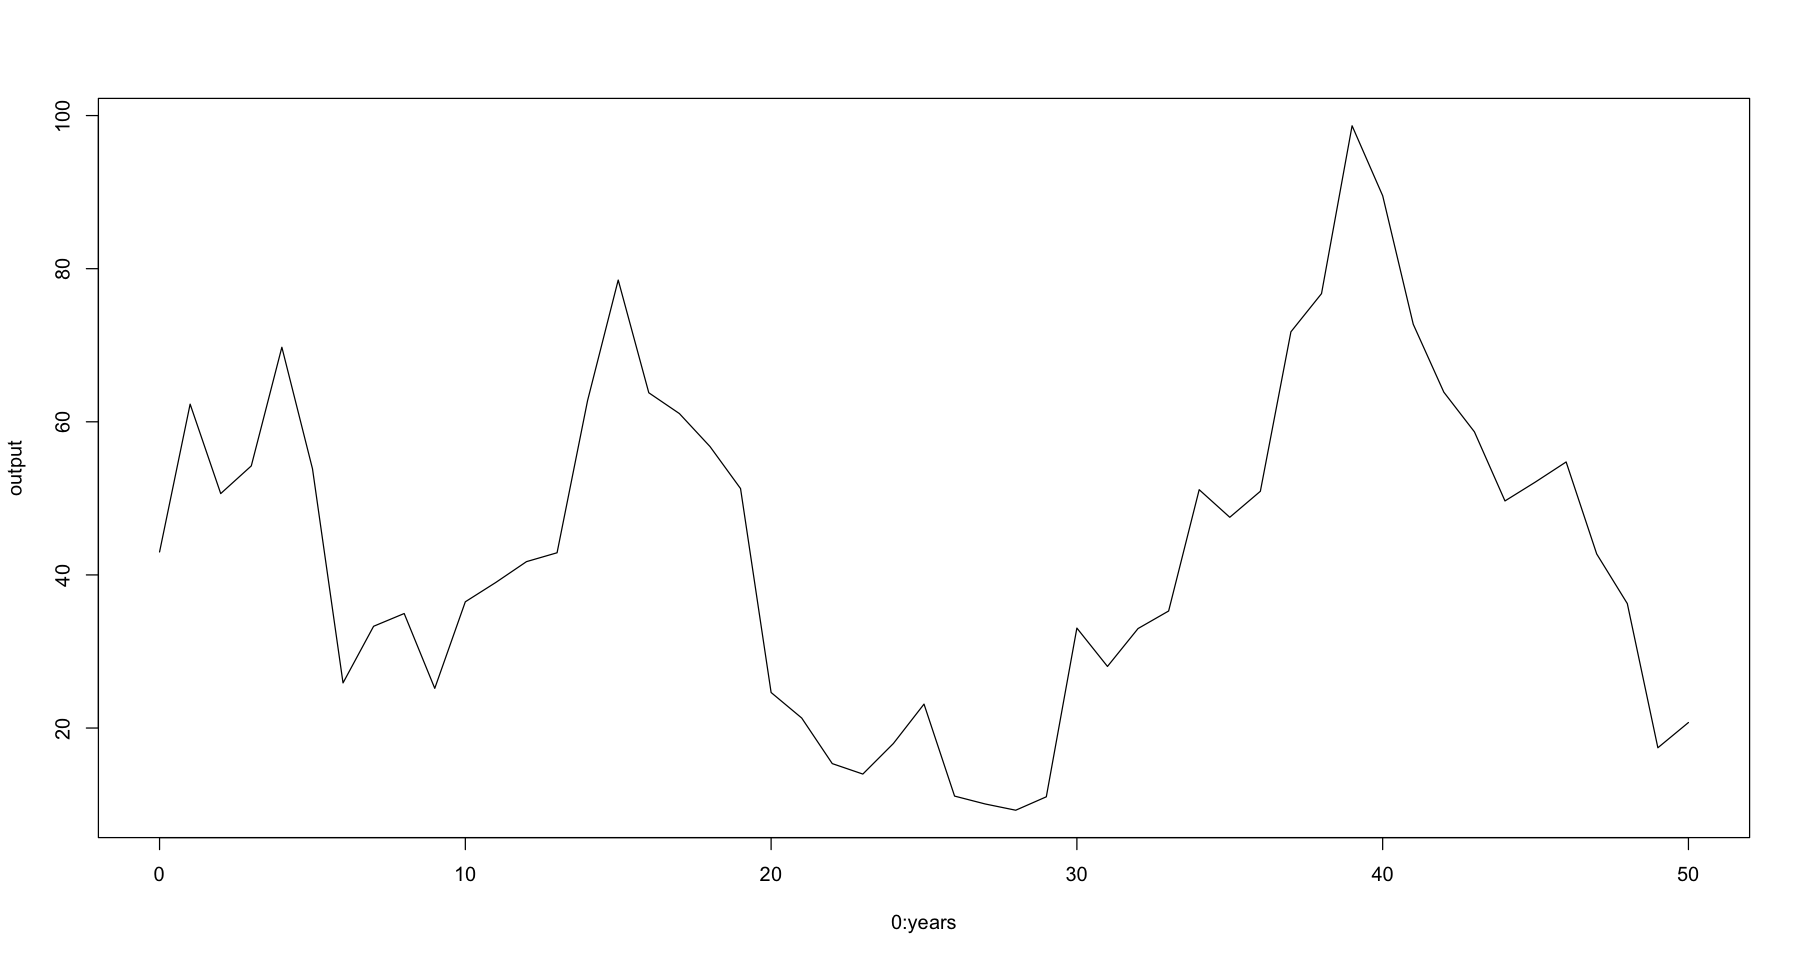

In [10]:
years = 50 
set.seed(3)
simulated.values = sample(x = obs.R, size = years, replace = TRUE)
output = numeric(years + 1)

output[1] = sparrows$Count[sparrows$Year == max(sparrows$Year)]

for(t in 1: years) {
    output[t+1] = output[t] * simulated.values[t]
}
plot(0:years, output, type = "l")

### Multiple simulations

In [11]:
run_simulation = function(sims, years) {
    sim.RM = matrix(sample(obs.R, sims * years, replace = TRUE), nrow = years, ncol = sims)
    output = numeric(years + 1)
    output[1] = sparrows$Count[sparrows$Year == max(sparrows$Year)]
    outmat = sapply(1:sims, function(simulation_number) {
        for(year in 1:years) {
            output[year + 1] = output[year] * sim.RM[year, simulation_number]        
        }
        return(output)
    })
    return(outmat)
}
matrix = run_simulation(1000, 50)

In [14]:
last_year = matrix[51, ]
summary(last_year)
t.test(last_year)
quantile = qt(0.975, 999)
mean(last_year) - quantile * sd(last_year)/sqrt(999)
mean(last_year) + quantile * sd(last_year)/sqrt(999)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    0.04    12.39    62.15   747.00   309.55 72984.68 


	One Sample t-test

data:  last_year
t = 6.0404, df = 999, p-value = 2.166e-09
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 504.3226 989.6781
sample estimates:
mean of x 
 747.0003 


[1] 504.2011

[1] 989.7995

### What does the distribution of last year data look like ?

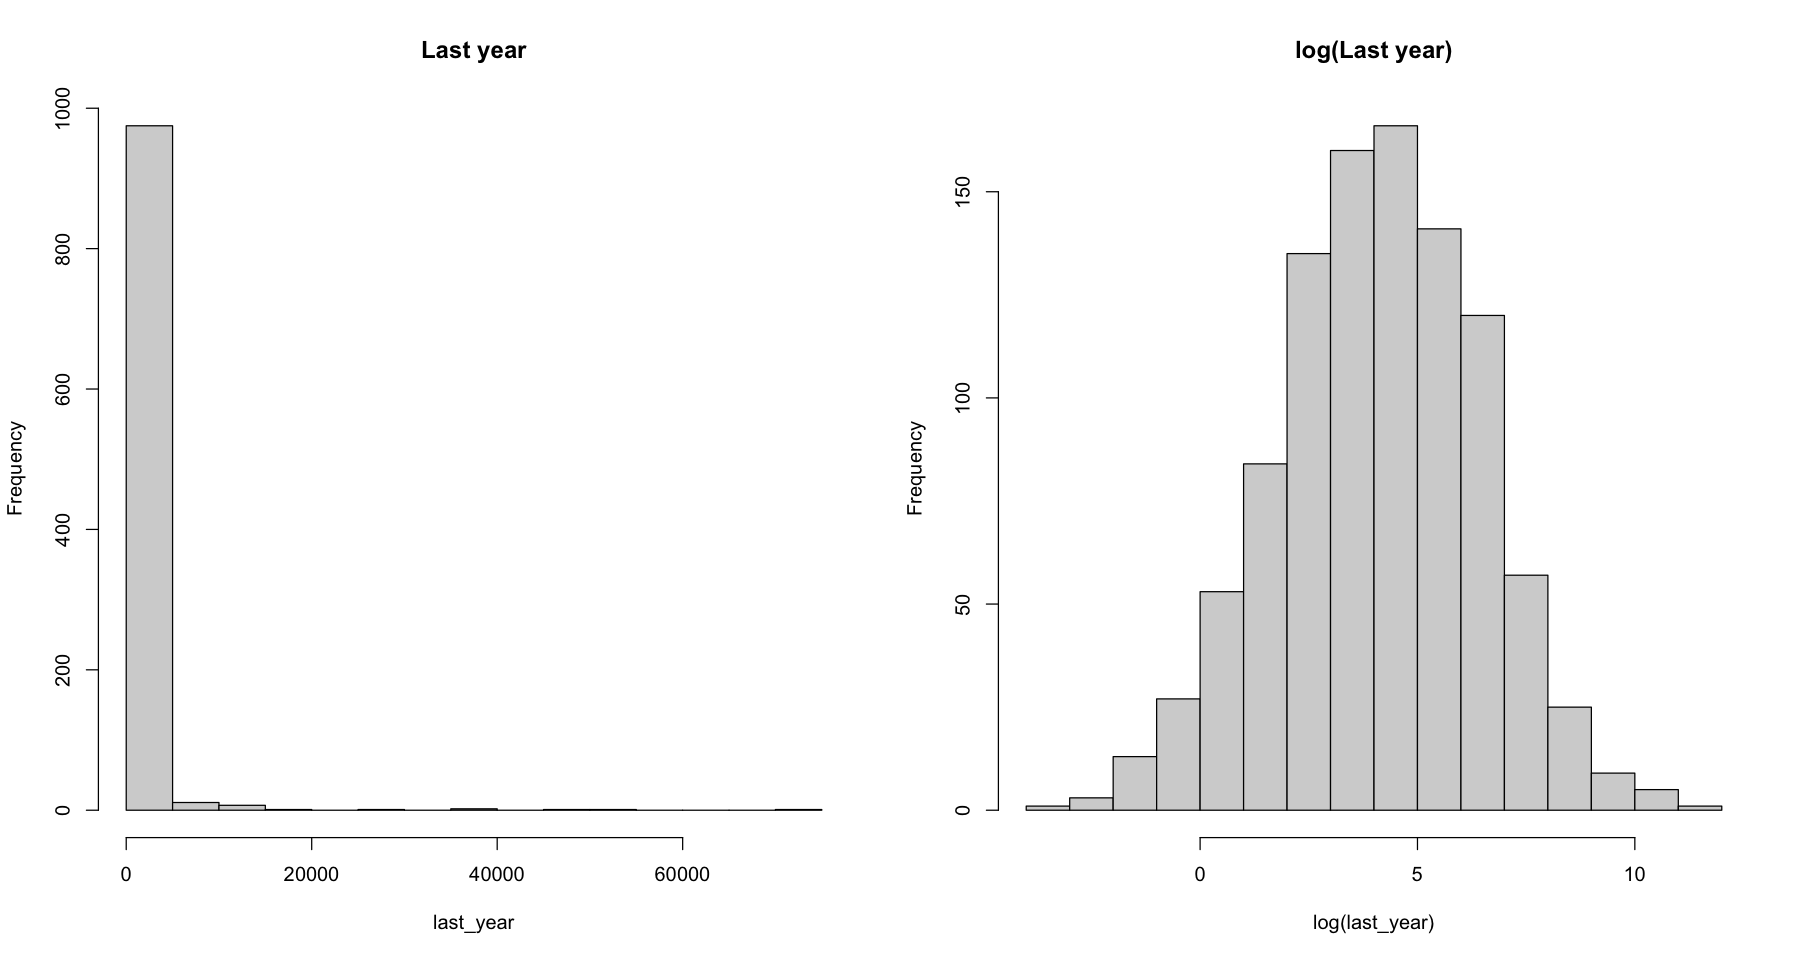

In [17]:
par(mfrow=c(1,2))
hist(last_year, main="Last year")
hist(log(last_year), main="log(Last year)")

Note that the last year data seems to be following a skewed log normal distribution. Usually when there's a log normal distribution, doing a log transformation will yield a normal distribution. In essence, what happens here is that if you have a r.v. X~N($\mu$, $\sigma^2$) and you apply the transformation $Y=e^{x}$, Y will have a log-normal distribution (the histogram on the lhs). If you do $log(Y)$ you will get back to a r.v. X that has Normal distribution (the histogram on the right hand side). 